## CNN Model 설계 - MNIST 사용 

In [2]:
%matplotlib inline
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
from keras import models
from keras import layers

Using TensorFlow backend.


# 컨볼루션 신경망의 설계 
* Input(28x28x1) -> CONV(K:3x3, 32, relu) -> POOL(2x2) -> CONV(K:3x3, 64, relu) -> POOL(2x2) -> CONV(K:3x3, 64, relu) -> Flatten -> FCN(64) -> Output(class:10)

In [4]:
model = ..........



In [5]:
model.______

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.datasets import mnist
from keras.utils import ......

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = _____(train_labels)
test_labels = _____(test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              #optimizer=......... ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
batch_size = 64

history = model.____



Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 28s 585us/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0034 - val_acc: 0.9994
Epoch 2/30
48000/48000 [==============================] - 37s 773us/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 3/30
48000/48000 [==============================] - 37s 769us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0055 - val_acc: 0.9992
Epoch 4/30
48000/48000 [==============================] - 37s 766us/step - loss: 0.0041 - acc: 0.9994 - val_loss: 0.0105 - val_acc: 0.9982
Epoch 5/30
48000/48000 [==============================] - 37s 771us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0065 - val_acc: 0.9991
Epoch 6/30
48000/48000 [==============================] - 37s 769us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0021 - val_acc: 0.9998
Epoch 7/30
48000/48000 [==============================] - 37s 780us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.

## Training Model 저장 

In [9]:
model._____('model_mnist_soot1.h5')

## Training/Validation 오류 및 정확도 그래프 그리기

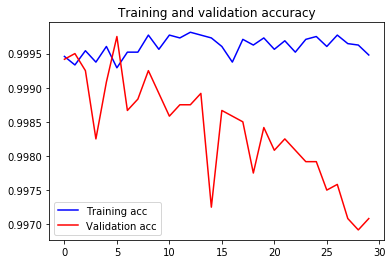

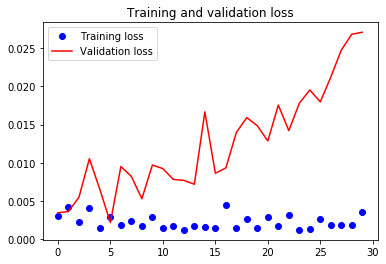

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test Dataset에 적용하여 모델 평가하기

In [19]:
test_loss, test_acc = model._______(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)  # 0.9925

10000/10000 [==============================] - 2s 165us/step
test_loss: 0.1185913779842488
test_acc: 0.9906
